# Notebook for generating trajectories and reviewing them

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import csv

def generate_figure8_trajectory(num_points=100, scale_x=10, scale_y=5, generate_csv:bool = False):
    """
    Generate a figure eight trajectory with position, yaw and velocity.
    Returns arrays of x, y, yaw (0 to 2π), and velocity values.

    AI Generated Code: Claude Sonnet 3.5
    """
    t = np.linspace(0, 2*np.pi, num_points)
    
    # Position
    x = scale_x * np.sin(t)
    y = scale_y * np.sin(t) * np.cos(t)
    
    # Velocity (derivative of position)
    dx = scale_x * np.cos(t)
    dy = scale_y * (np.cos(2*t))
    v = np.sqrt(dx**2 + dy**2)
    v = v/10 # To keep linear velocity between 0 ~ 20 m/s
    
    # Yaw (arctangent of velocity components), adjusted to 0-2π range
    yaw = np.arctan2(dy, dx)
    yaw = np.mod(yaw, 2*np.pi)  # Ensure yaw is between 0 and 2π
    
    trajectory = np.column_stack((x, y, yaw, v))
    csv_filename = "./data/figure_eight.csv"
    if generate_csv:
        with open(csv_filename, mode="w", newline="") as csv_file:
            writer = csv.writer(csv_file)
            # Write header
            writer.writerow(["x", "y", "yaw", "ref_v"])
            # Write data
            writer.writerows(trajectory)
        print(f"Trajectory saved to {csv_filename}")

    return trajectory

Trajectory saved to ./data/figure_eight.csv
(1201, 4)


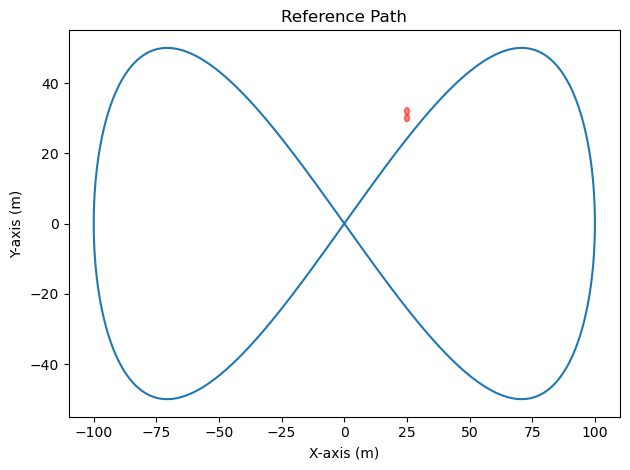

In [8]:
OBSTACLE_CIRCLES = np.array([
    [+ 25.0, +30.0, 1.0], # pos_x, pos_y, radius [m] in the global frame
    [+25.0, 32.0, 1.0], 
    ])

# Example usage
scale_ = 100
ref_path = generate_figure8_trajectory(num_points=1201,scale_x=scale_, scale_y=scale_, generate_csv=True)
print(ref_path.shape)
plt.title("Reference Path")
plt.xlabel("X-axis (m)")
plt.ylabel("Y-axis (m)")
# Plot circular obstacles
for circle in OBSTACLE_CIRCLES:
    obstacle = plt.Circle((circle[0], circle[1]), circle[2], color='red', alpha=0.5, label="Obstacle")
    plt.gca().add_artist(obstacle)
plt.plot(ref_path[:,0], ref_path[:,1])
plt.tight_layout()
plt.savefig("./figs/figure_eight.pdf", format="pdf")
plt.show() # plt.show() clears the figure, hence it needs to come later

# Each row contains [x, y, yaw, velocity]

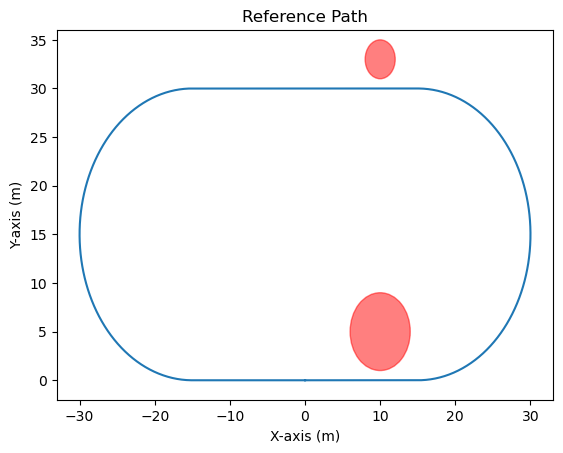

In [9]:
OBSTACLE_CIRCLES = np.array([
    [+ 10.0, +5.0, 4.0], # pos_x, pos_y, radius [m] in the global frame
    [+10.0, 33.0, 2.0], 
    ])

# Generate figure for the oval shape
ref_path = np.genfromtxt('./data/ovalpath_diff.csv', delimiter=',', skip_header=1)
plt.title("Reference Path")
plt.xlabel("X-axis (m)")
plt.ylabel("Y-axis (m)")
# Plot circular obstacles
for circle in OBSTACLE_CIRCLES:
    obstacle = plt.Circle((circle[0], circle[1]), circle[2], color='red', alpha=0.5, label="Obstacle")
    plt.gca().add_artist(obstacle)
# Plot path
plt.plot(ref_path[:,0], ref_path[:,1])
#plt.tight_layout()
plt.ylim([-2,36])
plt.savefig("./figs/oval_path.pdf", format="pdf")
plt.show() # plt.show() clears the figure, hence it needs to come later